In [1]:
# Installing neccessary library

# pip install tensorflow

In [1]:
# Importing necessary modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
!pip install scipy


You should consider upgrading via the 'C:\Users\vanya\OneDrive\Desktop\VANYA\IEEE_Open_Source\Waste-Segregation\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import scipy
print(scipy.__version__)


1.15.3


In [3]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [4]:
# Setting ub ImageDataGenerator
train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [5]:
test_data = ImageDataGenerator(
    rescale = 1./255
)

In [6]:
# Determining batch size
batch_size = 32

In [7]:
# Loading Training Data
train = train_data.flow_from_directory(
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/Dataset/train",
    target_size = (200, 200),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 14165 images belonging to 2 classes.


In [8]:
# Loading testing data
test = test_data.flow_from_directory(
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/Dataset/val",
    target_size = (200, 200),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1201 images belonging to 2 classes.


In [9]:
# Building a CNN Model
model = Sequential([
    Conv2D(64, (2, 2), activation = 'relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation = 'relu'),
    Dense(train.num_classes, activation = 'softmax')
])

In [10]:
# Compiling the Model
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [11]:
# Training the model
history = model.fit(
    train,
    epochs = 5,
    validation_data = test
)

Epoch 1/5


 57/443 [==>...........................] - ETA: 12:55 - loss: 5.9152 - accuracy: 0.8536

C:\Users\vanya\OneDrive\Desktop\VANYA\IEEE_Open_Source\Waste-Segregation\venv\lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


443/443 [==============================] - 936s 2s/step - loss: 0.9696 - accuracy: 0.9048 - val_loss: 0.4000 - val_accuracy: 0.8418
Epoch 2/5
443/443 [==============================] - 688s 2s/step - loss: 0.1808 - accuracy: 0.9279 - val_loss: 0.4049 - val_accuracy: 0.8451
Epoch 3/5
443/443 [==============================] - 619s 1s/step - loss: 0.1713 - accuracy: 0.9325 - val_loss: 0.3852 - val_accuracy: 0.8476
Epoch 4/5
443/443 [==============================] - 616s 1s/step - loss: 0.1579 - accuracy: 0.9386 - val_loss: 0.3740 - val_accuracy: 0.8501
Epoch 5/5
443/443 [==============================] - 674s 2s/step - loss: 0.1548 - accuracy: 0.9377 - val_loss: 0.4690 - val_accuracy: 0.8410


In [12]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test, steps = test.samples // batch_size)
print("Test Loss:", test_loss)
print("Test accuracy:", test_accuracy)

37/37 [==============================] - 28s 760ms/step - loss: 0.4660 - accuracy: 0.8412
Test Loss: 0.46601974964141846
Test accuracy: 0.8412162065505981


In [14]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


You should consider upgrading via the 'C:\Users\vanya\OneDrive\Desktop\VANYA\IEEE_Open_Source\Waste-Segregation\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
log_dir = "training_logs"
os.makedirs(log_dir, exist_ok=True)
print("Saving logs to:", log_dir)

Saving logs to: training_logs


In [17]:
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{log_dir}/training_history.csv", index=False)
print("Training history saved.")

Training history saved.


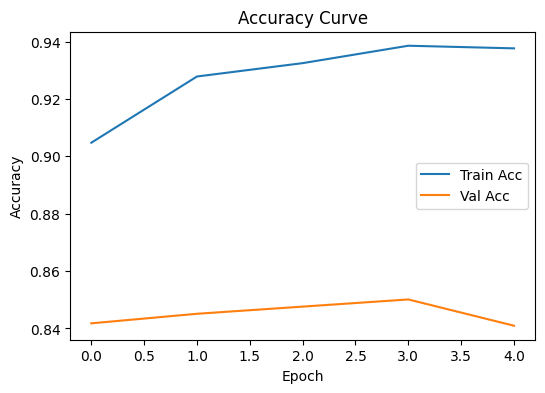

In [18]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(f"{log_dir}/accuracy_curve.png")
plt.show()

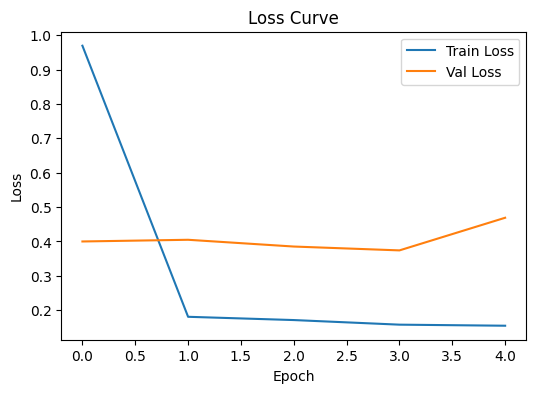

In [19]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig(f"{log_dir}/loss_curve.png")
plt.show()

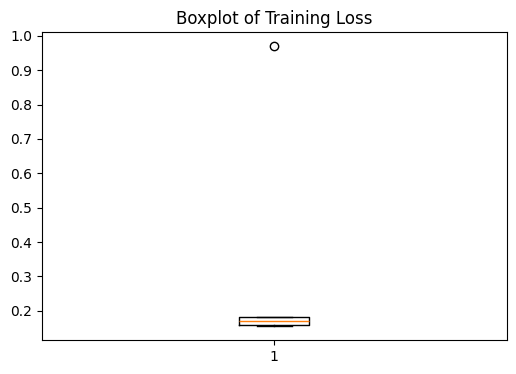

In [20]:
plt.figure(figsize=(6,4))
plt.boxplot(history.history['loss'])
plt.title("Boxplot of Training Loss")
plt.savefig(f"{log_dir}/loss_boxplot.png")
plt.show()

In [21]:
y_pred = model.predict(test)
y_pred_classes = np.argmax(y_pred, axis=1)

38/38 [==============================] - 9s 218ms/step


In [22]:
y_true = test.classes
class_labels = list(test.class_indices.keys())

In [24]:
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\vanya\OneDrive\Desktop\VANYA\IEEE_Open_Source\Waste-Segregation\venv\Scripts\python.exe -m pip install --upgrade pip' command.


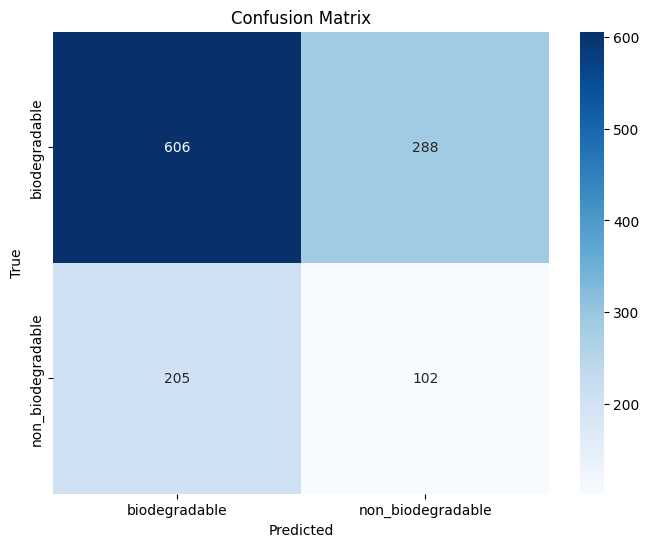

Confusion matrix saved.


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig(f"{log_dir}/confusion_matrix.png")
plt.show()

print("Confusion matrix saved.")

In [26]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred_classes, target_names=class_labels)

with open(f"{log_dir}/classification_report.txt", "w") as f:
    f.write(report)

print(report)
print("Classification report saved.")

                   precision    recall  f1-score   support

    biodegradable       0.75      0.68      0.71       894
non_biodegradable       0.26      0.33      0.29       307

         accuracy                           0.59      1201
        macro avg       0.50      0.51      0.50      1201
     weighted avg       0.62      0.59      0.60      1201

Classification report saved.


In [22]:
# Save the model
model.save('waste_segregation_model.keras')

In [13]:
# Classifying new images

In [23]:
# importing necessary libraries
from tensorflow.keras.preprocessing import image

In [24]:
def classify(img_path):
    img = image.load_img(
        img_path,
        target_size = (200, 200)
    )
    array = image.img_to_array(img) / 255.0
    array = np.expand_dims(array, axis=0)
    prediction = model.predict(array)

    if prediction[0][0] >= 0.5:
        return 'recyclable'
    else:
        return 'organic'

In [25]:
# Test with specific image paths
new_image = [
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash1.jpg",
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash2.jpg",
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash3.jpg",
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash4.jpg",
    "C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash5.jpg"
]

for img_path in new_image:
    category = classify(img_path)
    print(f"Image: {img_path}, Category: {category}")

1/1 [==============================] - 0s 107ms/step
Image: C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash1.jpg, Category: organic
1/1 [==============================] - 0s 36ms/step
Image: C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash2.jpg, Category: organic
1/1 [==============================] - 0s 36ms/step
Image: C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash3.jpg, Category: organic
1/1 [==============================] - 0s 36ms/step
Image: C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash4.jpg, Category: recyclable
1/1 [==============================] - 0s 46ms/step
Image: C:/Users/vanya/OneDrive/Desktop/VANYA/IEEE_Open_Source/ClassifyImages/trash5.jpg, Category: recyclable


In [26]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [27]:
model = load_model("waste_segregation_model.keras")

In [40]:
labels = list(train.class_indices.keys())

In [41]:
def preprocess_frame(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = cv2.resize(frame, (200, 200))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [30]:
!pip install pandas


You should consider upgrading via the 'C:\Users\vanya\OneDrive\Desktop\VANYA\IEEE_Open_Source\Waste-Segregation\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
import pandas as pd
import time
from tensorflow.keras.preprocessing import image

In [42]:
csv_path = "live_predictions.csv"
results_df = pd.DataFrame(columns=["Timestamp", "Predicted_Class", "Confidence"])
results_df.to_csv(csv_path, index=False)

In [43]:
cap = cv2.VideoCapture(0)
print("Starting real-time waste classification... Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Camera error")
        break

    # Preprocess
    img_array = preprocess_frame(frame)

    # Predict
    preds = model.predict(img_array, verbose=0)
    class_index = np.argmax(preds)
    pred_class = labels[class_index]
    confidence = float(np.max(preds) * 100)

    # Display on frame
    text = f"{pred_class} ({confidence:.2f}%)"
    cv2.putText(frame, text, (10, 40), cv2.FONT_HERSHEY_SIMPLEX,
                1, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.imshow("Live Waste Classification", frame)

    # Save to CSV
    new_entry = pd.DataFrame({
        "Timestamp": [time.strftime("%Y-%m-%d %H:%M:%S")],
        "Predicted_Class": [pred_class],
        "Confidence": [round(confidence, 2)]
    })
    new_entry.to_csv(csv_path, mode='a', header=False, index=False)

    # Quit key
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Starting real-time waste classification... Press 'q' to quit.


In [44]:
cap = cv2.VideoCapture(0)

print("Starting live classification... Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to capture frame. Exiting...")
        break

    # Predict
    processed = preprocess_frame(frame)
    preds = model.predict(processed, verbose=0)
    pred_class = labels[np.argmax(preds)]
    confidence = float(np.max(preds)) * 100

    # Get frame dimensions
    h, w, _ = frame.shape

    # Bounding box coordinates (center box)
    box_w, box_h = int(w * 0.5), int(h * 0.5)  # box size
    x1 = int((w - box_w) / 2)
    y1 = int((h - box_h) / 2)
    x2 = x1 + box_w
    y2 = y1 + box_h

    # Draw bounding box (green)
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Put prediction text
    label_text = f"{pred_class.upper()} ({confidence:.2f}%)"
    cv2.putText(frame, label_text, (x1, y1 - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Show frame
    cv2.imshow("Live Waste Classification", frame)

    # Save to CSV
    new_entry = pd.DataFrame({
        "Timestamp": [time.strftime("%Y-%m-%d %H:%M:%S")],
        "Predicted_Class": [pred_class],
        "Confidence": [round(confidence, 2)]
    })
    new_entry.to_csv(csv_path, mode='a', header=False, index=False)

    # Quit on 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

print("Live predictions saved to live_predictions.csv")

Starting live classification... Press 'q' to quit.
Live predictions saved to live_predictions.csv
